<a href="https://colab.research.google.com/github/badrGADI/Portfolio/blob/main/Gadi_Badr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [ ]:
data=pd.read_csv('AirQualityUCI.csv',sep=';')
data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360,150,"11,9",1046,166,1056,113,1692,1268,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292,112,"9,4",955,103,1174,92,1559,972,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402,88,9,939,131,1140,114,1555,1074,"11,9",54,"0,7502"
3,10/03/2004,21.00.00,"2,2",1376,80,"9,2",948,172,1092,122,1584,1203,11,60,"0,7867"
4,10/03/2004,22.00.00,"1,6",1272,51,"6,5",836,131,1205,116,1490,1110,"11,2","59,6","0,7888"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,"3,1",1314,-200,"13,5",1101,472,539,190,1374,1729,"21,9","29,3","0,7568"
9353,04/04/2005,11.00.00,"2,4",1163,-200,"11,4",1027,353,604,179,1264,1269,"24,3","23,7","0,7119"
9354,04/04/2005,12.00.00,"2,4",1142,-200,"12,4",1063,293,603,175,1241,1092,"26,9","18,3","0,6406"
9355,04/04/2005,13.00.00,"2,1",1003,-200,"9,5",961,235,702,156,1041,770,"28,3","13,5","0,5139"


In [ ]:
data["DateTime"] = data["Date"] + " " + data["Time"]
data.drop(['Date', 'Time'], axis=1,inplace=True)

nous avons regrouper les 2 colonnes en une colonne DateTime

In [ ]:
data.set_index('DateTime',inplace=True)

on a rendu DateTime comme indexe

In [ ]:
data['C6H6(GT)']=data['C6H6(GT)'].str.replace(',','.')
data['CO(GT)']=data['CO(GT)'].str.replace(',','.')
data['T']=data['T'].str.replace(',','.')
data['RH']=data['RH'].str.replace(',','.')
data['AH']=data['AH'].str.replace(',','.')
data['C6H6(GT)']=data['C6H6(GT)'].astype(float)
data[['CO(GT)','T','RH','AH']] = data[['CO(GT)','T','RH','AH']].astype(float)

pour transformer les valeurs en float, on doit d'abord remplacer les virgules par des points'.',puis on les a transformer en float.

In [ ]:
data.dropna(axis=0, how= 'all', inplace=True)
data.dropna(axis=1, inplace=True)

In [ ]:
data.replace(to_replace= -200, value= np.NaN, inplace= True)
data.tail()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
DateTime,,,,,,,,,,,,,
04/04/2005 10.00.00,3.1,1314.0,NaN,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
04/04/2005 11.00.00,2.4,1163.0,NaN,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
04/04/2005 12.00.00,2.4,1142.0,NaN,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
04/04/2005 13.00.00,2.1,1003.0,NaN,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139
04/04/2005 14.00.00,2.2,1071.0,NaN,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


on va remplacer dans toutes les cases qui contiennet -200 par NaN

In [ ]:
data.fillna(data.mean(), inplace= True)

on va remplacer les NaN par la moyenne de cette colonne qui contient ce NaN

In [ ]:
x=data.drop('C6H6(GT)',axis=1)
y=data['C6H6(GT)']

la cible contient que la colonne C6H6
alors que les features contiennet toutes les colonnes sauf la colonne C6H6 qui represente la cible

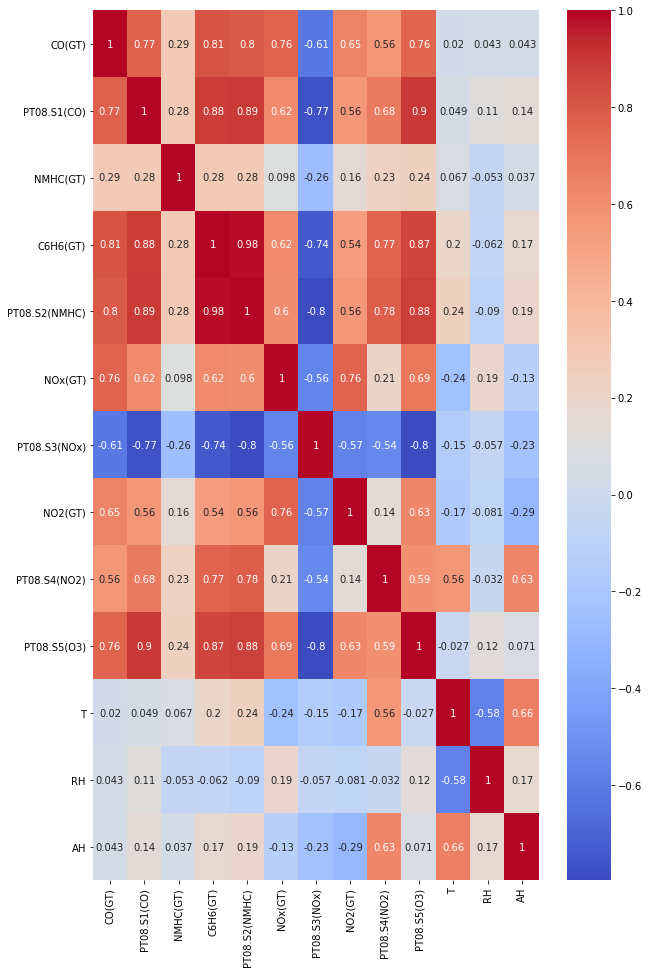

In [ ]:
plt.figure(figsize=(10,16))
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")

matrice de correlation 

In [ ]:
data.drop('T',axis=1,inplace=True)
data.drop('RH',axis=1,inplace=True)
data.drop('AH',axis=1,inplace=True)
data.drop('NMHC(GT)',axis=1,inplace=True)
data.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3)
DateTime,,,,,,,,,
10/03/2004 18.00.00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0
10/03/2004 19.00.00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0
10/03/2004 20.00.00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0
10/03/2004 21.00.00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0
10/03/2004 22.00.00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0


on a supprimé toutes les colonnes qui ne sont pas correlées avec notre cible ,et nous avons laissé que celles qui sont correlées.

# ***Linear Regression***

In [ ]:
list_var=data.columns.drop("C6H6(GT)")
y=data['C6H6(GT)']
x=data[list_var]

la cible contient que la colonne C6H6
alors que les features contiennet toutes les colonnes sauf la colonne C6H6 qui represente la cible

In [ ]:
x_tra,x_test,y_tra,y_test=train_test_split(x,y,test_size=0.3, random_state=0)

In [ ]:
ml=LinearRegression()
ml.fit(x_tra,y_tra)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred=ml.predict(x_test)
print(y_pred)

[ 5.8586366  -0.64145436  1.47202755 ...  2.0612878   8.84752496
  6.84254088]


In [ ]:
ml.predict([[2.6,1360.0,1046.0,166.0,1056.0,113.0,1692.0,1268.0]])


array([14.25935436])

In [ ]:
r2_score(y_test,y_pred)

0.9765923503231557

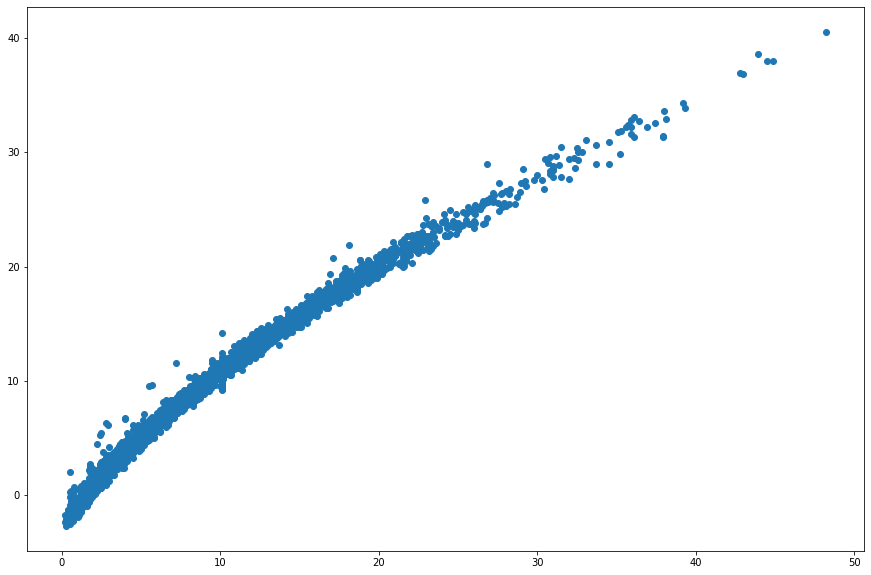

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred) 

plt.show()

In [ ]:
pred_y_df=pd.DataFrame({'actual value':y_test,'predicted value':y_pred,'difference':y_test-y_pred})
pred_y_df

,actual value,predicted value,difference
DateTime,,,
26/04/2004 11.00.00,5.2,5.858637,-0.658637
08/02/2005 06.00.00,1.6,-0.641454,2.241454
16/08/2004 05.00.00,2.4,1.472028,0.927972
18/09/2004 05.00.00,2.3,1.998312,0.301688
04/04/2004 05.00.00,3.0,2.983114,0.016886
...,...,...,...
31/08/2004 02.00.00,2.9,1.876185,1.023815
26/03/2005 11.00.00,9.3,9.885247,-0.585247
05/04/2004 01.00.00,2.4,2.061288,0.338712


In [ ]:
rmse_reg=np.sqrt(mean_squared_error(y_test,y_pred))     
print('Baseline RMSE of model:',rmse_reg)

Baseline RMSE of model: 1.0907187408338643


# ***Decision Tree Regressor***

In [ ]:
dtr=DecisionTreeRegressor()
dtr.fit(x_tra,y_tra)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_pred1=dtr.predict(x_test)
print(y_pred1)

[5.2 1.6 2.4 ... 2.4 7.6 5.7]


In [ ]:
dtr.predict([[2.6,1360.0,1046.0,166.0,1056.0,113.0,1692.0,1268.0]])

array([11.9])

In [ ]:
r2_score(y_test,y_pred1)

0.9999605503140795

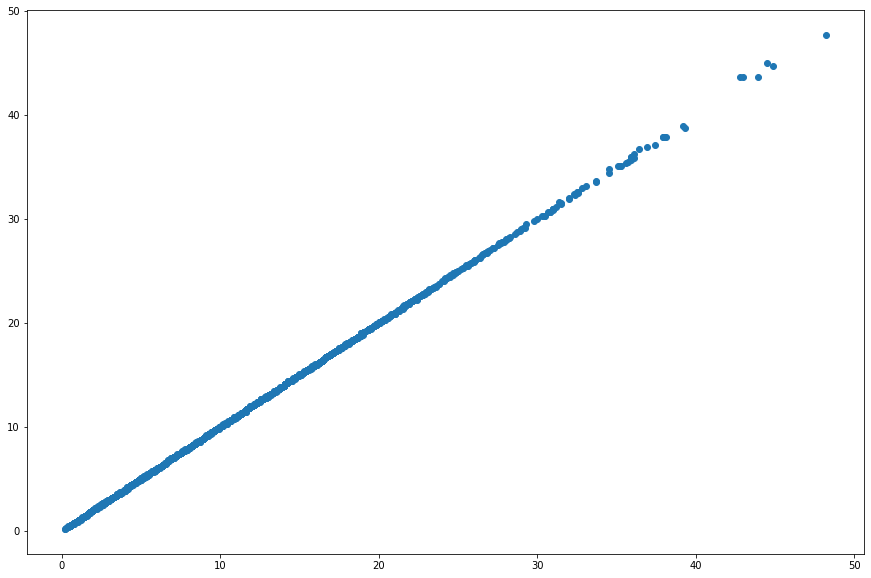

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(y_test,y_pred1,'o')
plt.show()
plt.show()

In [ ]:
pred_y_df=pd.DataFrame({'actual value':y_test,'predicted value':y_pred1,'difference':y_test-y_pred1})
pred_y_df

,actual value,predicted value,difference
DateTime,,,
26/04/2004 11.00.00,5.2,5.2,3.552714e-15
08/02/2005 06.00.00,1.6,1.6,-4.440892e-16
16/08/2004 05.00.00,2.4,2.4,-1.332268e-15
18/09/2004 05.00.00,2.3,2.3,0.000000e+00
04/04/2004 05.00.00,3.0,3.0,0.000000e+00
...,...,...,...
31/08/2004 02.00.00,2.9,2.9,-2.220446e-15
26/03/2005 11.00.00,9.3,9.3,-3.552714e-15
05/04/2004 01.00.00,2.4,2.4,-1.332268e-15


In [ ]:
rmse_dec_reg=np.sqrt(mean_squared_error(y_test,y_pred1))     
print('Baseline RMSE of model:',rmse_dec_reg)

Baseline RMSE of model: 0.044777067288800404


# ***Random Forest Regressor***

In [ ]:
dt1=RandomForestRegressor()
dt1.fit(x_tra,y_tra)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred2=dt1.predict(x_test)
print(y_pred2)

[5.2   1.6   2.404 ... 2.407 7.6   5.735]


In [ ]:
dt1.predict([[2.6,1360.0,1046.0,166.0,1056.0,113.0,1692.0,1268.0]])

array([11.9])

In [ ]:
r2_score(y_test,y_pred2)

0.9999507105043465

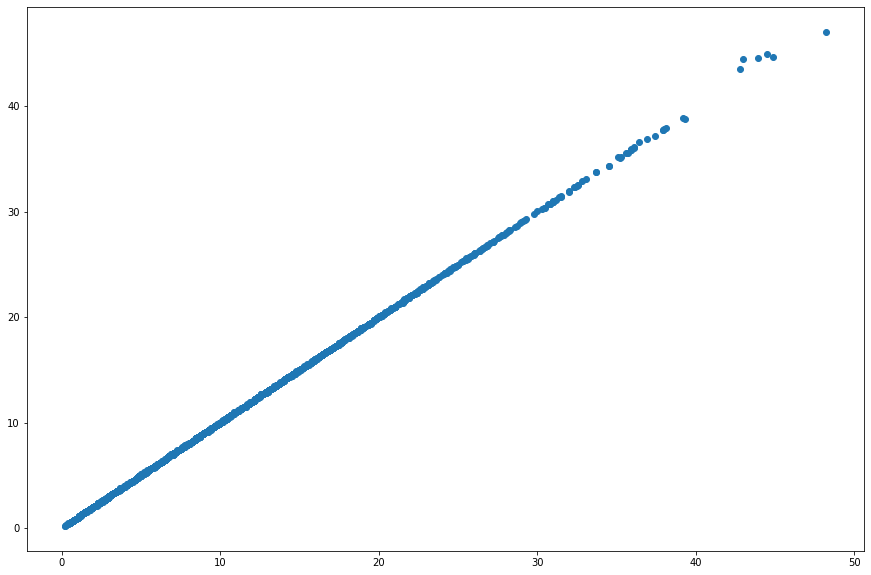

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(y_test,y_pred2,'o')
plt.show()
plt.show()

In [ ]:
pred_y_df=pd.DataFrame({'actual value':y_test,'predicted value':y_pred2,'difference':y_test-y_pred2})
pred_y_df

,actual value,predicted value,difference
DateTime,,,
26/04/2004 11.00.00,5.2,5.200,7.993606e-15
08/02/2005 06.00.00,1.6,1.600,2.886580e-15
16/08/2004 05.00.00,2.4,2.404,-4.000000e-03
18/09/2004 05.00.00,2.3,2.328,-2.800000e-02
04/04/2004 05.00.00,3.0,2.997,3.000000e-03
...,...,...,...
31/08/2004 02.00.00,2.9,2.901,-1.000000e-03
26/03/2005 11.00.00,9.3,9.301,-1.000000e-03
05/04/2004 01.00.00,2.4,2.407,-7.000000e-03


In [ ]:
rmse_for_reg=np.sqrt(mean_squared_error(y_test,y_pred2))      
print('Baseline RMSE of model:',rmse_for_reg)

Baseline RMSE of model: 0.05005080396165312


# ***SVR***

In [ ]:
dt2=SVR()
dt2.fit(x_tra,y_tra)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred3=dt2.predict(x_test)
print(y_pred3)

[5.09419266 1.56873998 2.49511814 ... 2.43546258 7.5558179  5.72044576]


In [ ]:
dt2.predict([[2.6,1360.0,1046.0,166.0,1056.0,113.0,1692.0,1268.0]])

array([11.91014469])

In [ ]:
r2_score(y_test,y_pred3)

0.9969314323528946

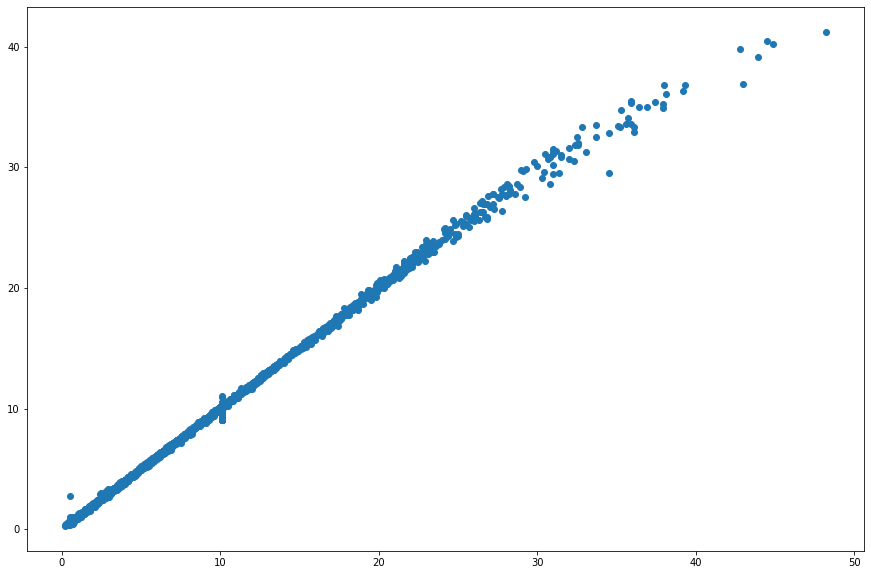

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(y_test,y_pred3,'o')
plt.show()
plt.show()

In [ ]:
pred_y_df=pd.DataFrame({'actual value':y_test,'predicted value':y_pred3,'difference':y_test-y_pred3})
pred_y_df

,actual value,predicted value,difference
DateTime,,,
26/04/2004 11.00.00,5.2,5.094193,0.105807
08/02/2005 06.00.00,1.6,1.568740,0.031260
16/08/2004 05.00.00,2.4,2.495118,-0.095118
18/09/2004 05.00.00,2.3,2.265820,0.034180
04/04/2004 05.00.00,3.0,2.929902,0.070098
...,...,...,...
31/08/2004 02.00.00,2.9,2.922330,-0.022330
26/03/2005 11.00.00,9.3,9.060549,0.239451
05/04/2004 01.00.00,2.4,2.435463,-0.035463


In [ ]:
rmse_svr=np.sqrt(mean_squared_error(y_test,y_pred3))      
print('Baseline RMSE of model:',rmse_svr)

Baseline RMSE of model: 0.39491326487960576


# ***BEST MODEL***

In [ ]:
if (rmse_dec_reg<rmse_for_reg and rmse_dec_reg<rmse_reg and rmse_dec_reg<rmse_svr):
  print ('the best model is Decision Tree Regressor')
elif (rmse_for_reg<rmse_dec_reg and rmse_for_reg<rmse_reg and rmse_for_reg<rmse_svr):
  print('the best model is Random Forest Regressor')
elif (rmse_reg<rmse_dec_reg and rmse_reg<rmse_for_reg and rmse_reg<rmse_svr):
  print('the best model is Linear Regression')
else :
  print('the best model is SVR')



the best model is Decision Tree Regressor
